In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# paths of folders 
true_dir = r"D:\My applicatios\MCQ\my_dataset\newTrue/"  # true folders
false_dir = r"D:\My applicatios\MCQ\my_dataset\false/"  # false folders

In [3]:
img_size = (128, 128)  # size of image
data = []
labels = []

In [4]:
# upload images from true folders
for filename in os.listdir(true_dir):
    filepath = os.path.join(true_dir, filename)
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img = cv2.imread(filepath)
        img = cv2.resize(img, img_size)  # resize image
        data.append(img)
        labels.append(1)  # Label for true folders

In [5]:
# upload images from false folders
for filename in os.listdir(false_dir):
    filepath = os.path.join(false_dir, filename)
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img = cv2.imread(filepath)
        img = cv2.resize(img, img_size)
        data.append(img)
        labels.append(0)  # Label for true folders

In [6]:
#  Tranfer values to  NumPy Arrays
data = np.array(data) / 255.0  # (Normalize)
labels = np.array(labels)

In [7]:
# test 4 random images to display data 
sample_indices = np.random.choice(len(data), 4, replace=False)
sample_images = data[sample_indices]
sample_labels = labels[sample_indices]

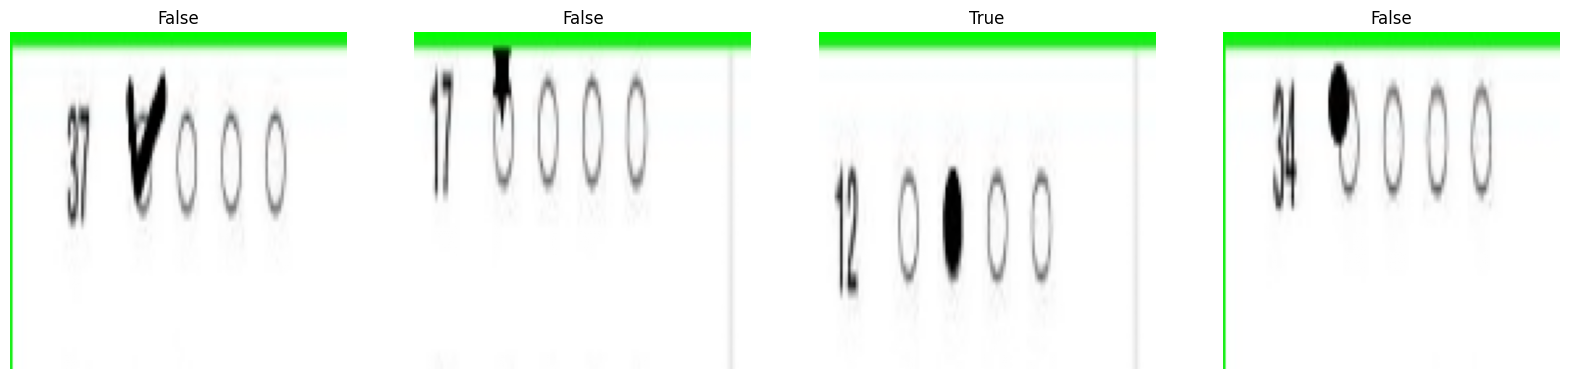

In [8]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 5))  #  display 4 images in one row 
for idx, img in enumerate(sample_images):
    ax[idx].imshow(img)
    ax[idx].title.set_text("True" if sample_labels[idx] == 1 else "False")  # Image labels
    ax[idx].axis('off')  # Hide the axes to clarify the image only

plt.show()

In [9]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [10]:
# ========== Model building ==========
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(128, activation="relu"),
    Dropout(0.5),  # لتجنب الـ Overfitting
    Dense(1, activation="sigmoid")  # Binary class output layer (true/false)
])


c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Assemble the model
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",  # لأننا بنحل مشكلة تصنيف binary
    metrics=["accuracy"]
)

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 232,897 (909.75 KB)

 Trainable params: 232,897 (909.75 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# ========== Training model ==========
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,  # عدد التكرارات
    batch_size=32,  # حجم الدفعة
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - accuracy: 0.5033 - loss: 0.6953 - val_accuracy: 0.6678 - val_loss: 0.6714
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - accuracy: 0.7121 - loss: 0.5993 - val_accuracy: 0.8804 - val_loss: 0.3701
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 127ms/step - accuracy: 0.9185 - loss: 0.2349 - val_accuracy: 0.9169 - val_loss: 0.2351
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.9567 - loss: 0.1429 - val_accuracy: 0.9535 - val_loss: 0.1612
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.9733 - loss: 0.0895 - val_accuracy: 0.9635 - val_loss: 0.1378
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - accuracy: 0.9580 - loss: 0.1133 - val_accuracy: 0.9468 - val_loss: 0.1577
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 153ms/step - accuracy: 0.9845 - loss: 0.0403 - val_accuracy: 0.9701 - val_loss: 0.1640
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - accuracy: 0.9932 - loss: 0.0322 - val_accuracy: 0.

In [14]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [21]:
# Calculate the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

In [22]:
# Calculate precision, positive precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

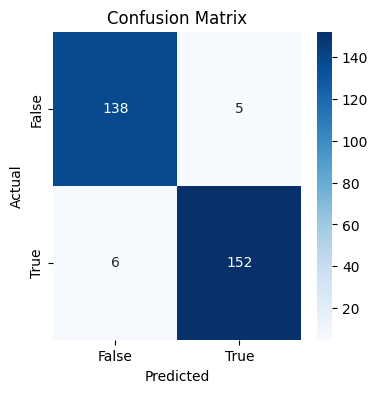

In [23]:
# Display the Confusion Matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["False", "True"], yticklabels=["False", "True"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [24]:
# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9635
Precision: 0.9682
Recall: 0.9620


### ==========  Performance evaluation ==========

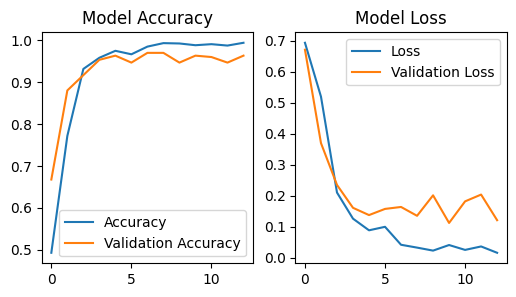

In [25]:
# Performance drawing
plt.figure(figsize=(6, 3))

# Draw model accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")

# Draw loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")

plt.show()

In [26]:
# ========== Save the model ==========
model.save("answer_classification_model_new_update_Final9.h5")
print("Model saved successfully!")


Model saved successfully!
